In [2]:
# Importing Required Libraries

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Importing dataset

In [131]:
# Reading the csv file from dataset
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Here I am importing dataset into a variable "df". From the dataset we can notice there are 14 columns which contains both features and one target variable. Here "Average Price" is the target variable which contains continuous data so it is a regression type problem. The dataset contains both numerical and categorical columns.

As seen in the dataset the column Unnamed is taken on the basis of index purpose which does not play any important role in the price prediction of avocado, so I am dropping this column.

In [4]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)

Here I have dropped the column Unnamed:0.

In [5]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory Data Analysis (EDA)

In [6]:
# Checking the dimension of the dataset
df.shape

(18249, 13)

There are 18249 rows and 13 columns are there in the dataset. Out of 13, 12 are different features and remaining one is the label "Average Price".

In [7]:
# Checking the types of the dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The columns in the dataset contains three different types of data namely float, integer and object data type. There are 3 columns having object data type that are categorical in nature which we need to process separately by using encoding methods.

The Date column showing object data type which means python is not able to understand the type of Date. So let's do feature engineering to split Date into Month and Day. Since year column is already been there so no need to separate it.

# Feature engineering

In [8]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [9]:
# Checking the type of data again
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

We can see the Date column has datetime data type. Now let's split this data into months and day.

In [10]:
df["Month"] = df["Date"].dt.month

In [11]:
df["Day"] = df["Date"].dt.day

Now we have separated Month and Day from Date column and now the column Date is of no use, so let's drop it.

In [12]:
df.drop("Date",axis=1,inplace=True)

In [13]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


We have extracted amaonth and Day from Date column and dropped Date column since it was of no use. Abive is the dataframe after feature engineering.

In [14]:
# Again check the shape of the dataset
df.shape

(18249, 14)

There are 18249 rows and 14 columns. Here we have added two more columns from date.

In [15]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


This gives the brief information about the dataset which includes indexing type, column type, no-null values and memory usage.

In [16]:
# Checking number of unique values in each column
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

These are the number of unique values present in each columns.

In [17]:
# Checking null values in the dataset
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

It is clear that there are no null values present in the dataset.

<AxesSubplot:>

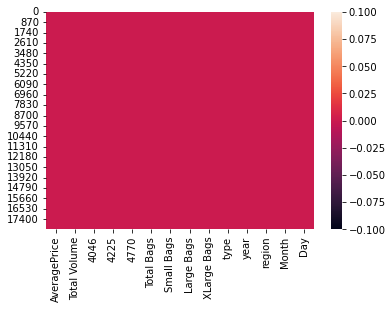

In [18]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

By visualizing also we can say there are no missing values. So our data is cleaned. Let's move further.

In [19]:
# Checking how many columns are there in the dataset
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

These are the columns name present in the given dataset.

In [20]:
# Checking the uniqueness of target variable
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

These are the unique values present in the target variable.

In [21]:
# List of values in the target variable
df["AveragePrice"].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

This gives the list of values in the target variable which has int64 data type.

In [22]:
# Checking wheather the dataset contains any space
df.loc[df['AveragePrice']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day


So from the above observation we can say there are no spaces present in the dataset.

# Description of Dataset

In [24]:
# Statistical summary of dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.372842,15.466984
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.525034,8.984552
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,10.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things.

The counts of all the columns are same which means there are no null values present in the daaset.

The label Average Price has mean which is bit greater than median, means it is skewed to right. The minimum price of the single fruit avocado is 0.44 dollars(say), max is 3.25 and mean is 1.04.

The mean and the median(50%) are very close to each other in most of the columns like 4225(Total number of avocados with PLU 4225), year, Month, Day which means the data is symmetrical (normal) in these columns.

The mean is greater than the median in most of the columns which means they are skewed to right.

In some of the columns median is greater than the mean, hence they are skewed to left.

Most of the columns have nearly zero statistics also the mean and the standard deviation are very close to each other.

By looking at the difference between max and 75% (3rd quantile), we can infer there are outliers present in most of the column. We will remove this outliers in further steps.

Before visualizing the data let's separate the categorical and numerical columns.

In [25]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


These are the categorical columns that we have, will encode these columns using either label encoder or one hot encoder.

In [26]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


These are the numerical columns present in the dataset.

# Data Visualization

# Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


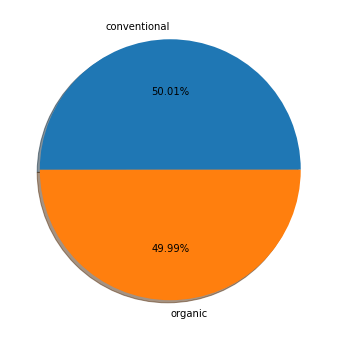

In [27]:
#Visualize the count of type of the avocado
print(df["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

We can observe both conventional and organic types of avocado are equal in counts. Which means half of the avocado products involves chemicals. Both types have equal demand.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


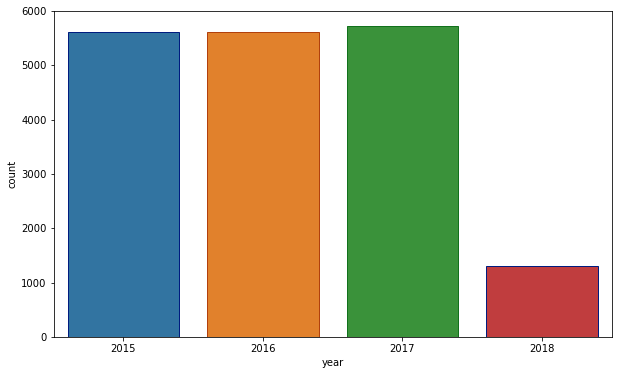

In [28]:
#Visualize the count of year
print(df["year"].value_counts())
plt.figure(figsize=(10,6))

sns.countplot(df["year"],edgecolor=sns.color_palette("dark", 3))
plt.show()

The count of 2017 is bit higher than 2016 and 2015, 2018 has very less count, whch means the price and the sales of avocado is less in this year

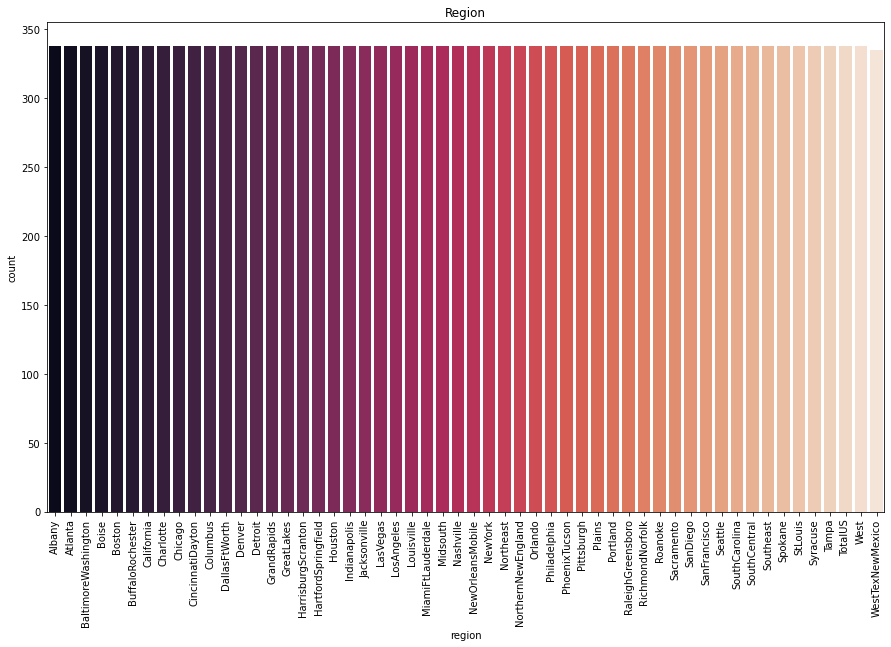

In [29]:
#Visualize the count of year
plt.figure(figsize=(15,9))
sns.countplot(df["region"],palette="rocket")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

We can observe the count of avocado is almost same in all the regions, all of them have the count 338 but WestTexNewMexico has count 335 which is bit less than others.

Let's plot the distribution plot to know how the data has been distributed in all the columns.

# Distribution of skewness

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


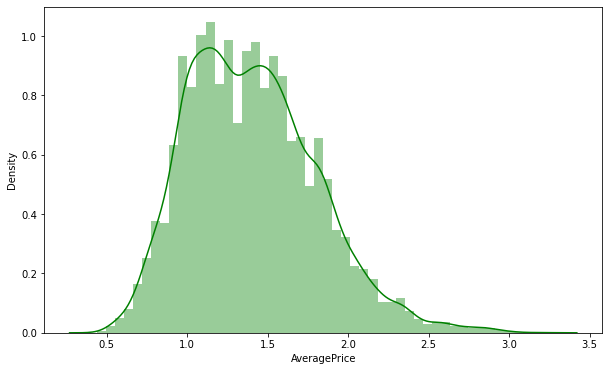

In [30]:
# Distribution plot for target variable "AveragePrice"
print(df["AveragePrice"].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(df["AveragePrice"], color="g")
plt.show()

Here we can infer that the data is normally distributed in the label. Also the price of the avocado is more between 1.15 - 1.5.

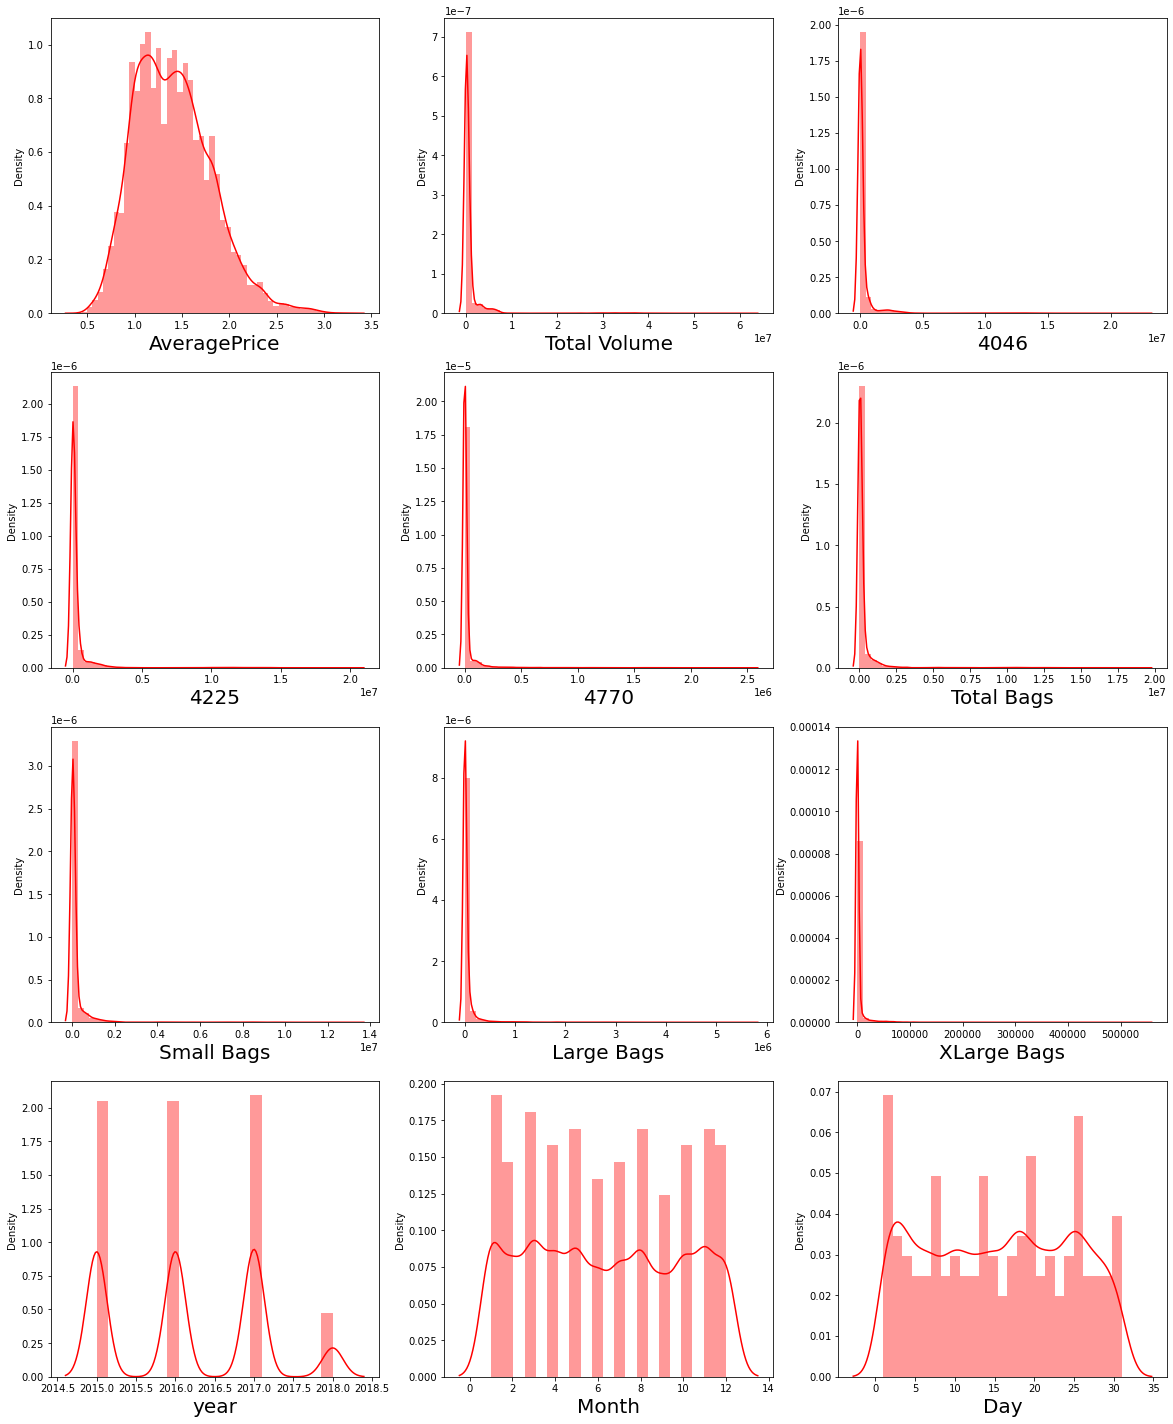

In [31]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the above distplots we can observe that none of the columns are normally distributed but AveragePrice.

Also the columns contains huge skewness most of them are skewed to left, which means median is more than the mean in these columns. So will remove these skewness later

# Bivariate Analysis

Text(0, 0.5, 'AveragePrice')

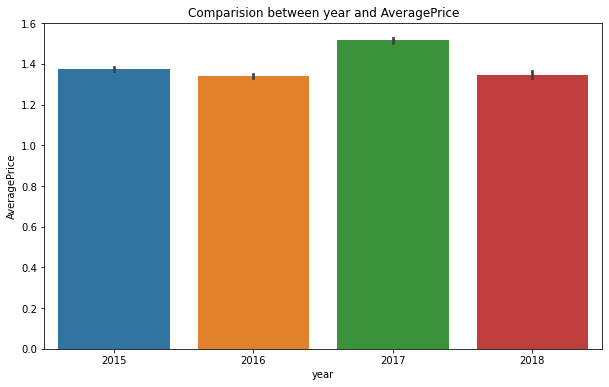

In [32]:
# Checking which year has maximum AveragePrice
plt.figure(figsize=[10,6])
plt.title('Comparision between year and AveragePrice')
sns.barplot(df['year'],df['AveragePrice'], data=df);
plt.xlabel("year")
plt.ylabel("AveragePrice")

The barplot shows that the AveragePrice is maximum in the year 2017 followed by 2015.

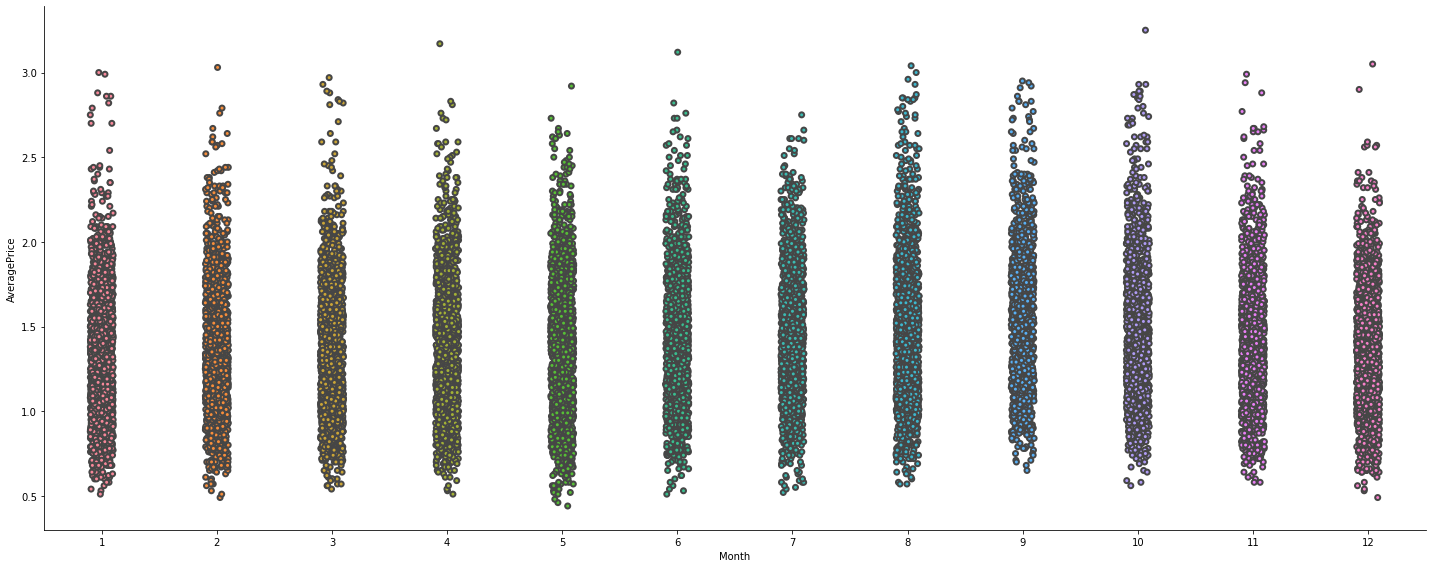

In [33]:
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=2.5)

Looking at the plot we can observe the Average Price remains high during August(8th month), September(9th month) and October and starts to drop from November onwards. Also the price of avocado is less in the months may to july and again there is an increment of price of avocado in the month April and March.

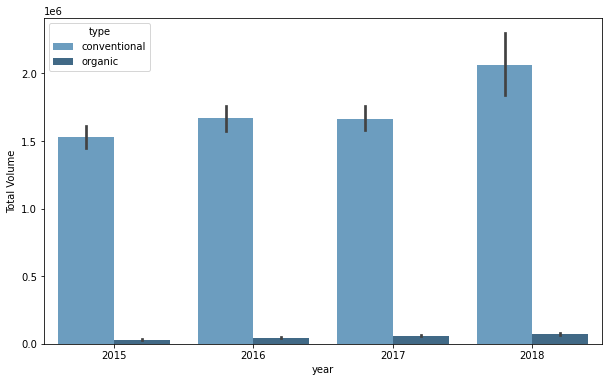

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette="Blues_d",ci=68)
plt.show()

Conventional types were sold higher every year with low price than Organic types which means the demand for conventional is high. Also The Total sales volume is spotted highest in the year 2018 and then declined in 2015. The total sales are same in the year 2016 and 2017.

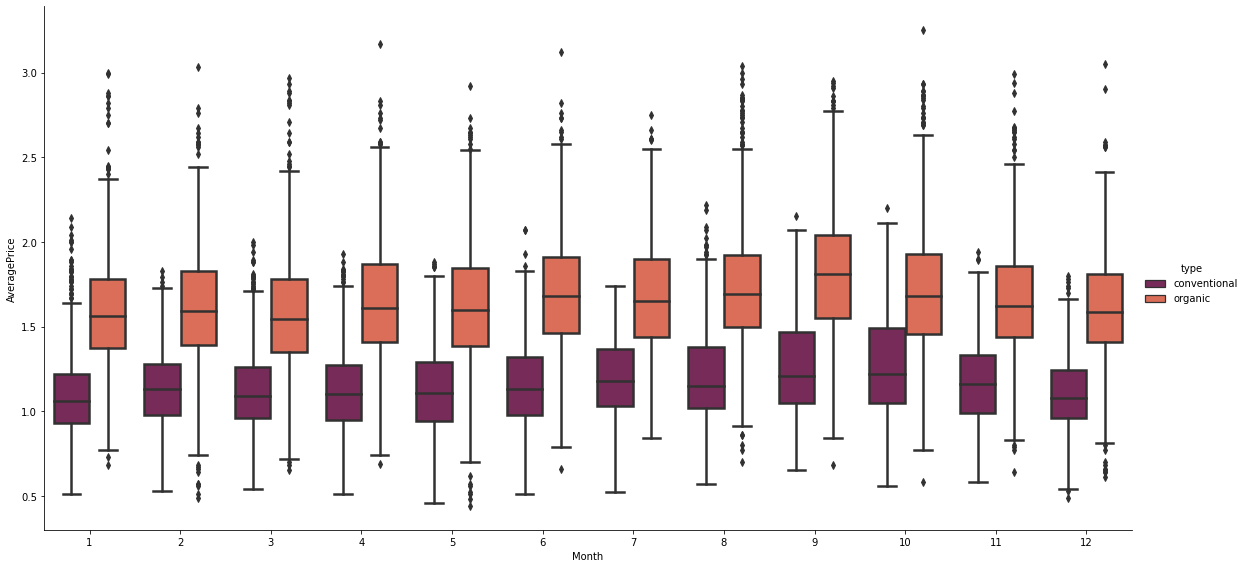

In [35]:
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8, linewidth=2.5, aspect=2,palette="rocket");

Here we can notice that the AveragePrice of organic avocado fruit is more than the conventional type. As we can observe the AveragePrice of both type of avocados is high in the months August, September and October and it pulled down in November. Also the price is high in April and March.

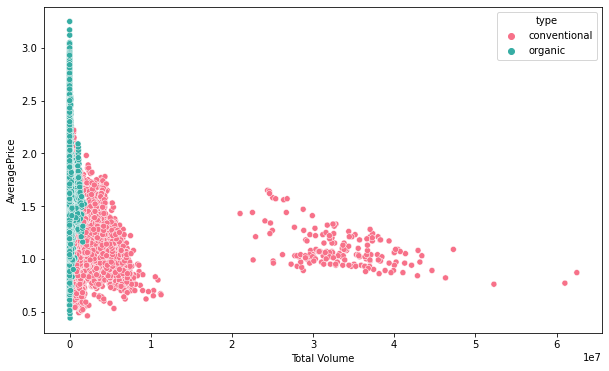

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=df,palette="husl")
plt.show()

The scatter plot gives the relationship between the total volume and average price on the basis of type. All organic type of avocado is lies in the volume zero and the average price is high for organic. The conventional type avocado has total volume 0-4 with the Average price upto 2.3. So the Average Price of the oraganic type with zero volume is more than the conventional type.

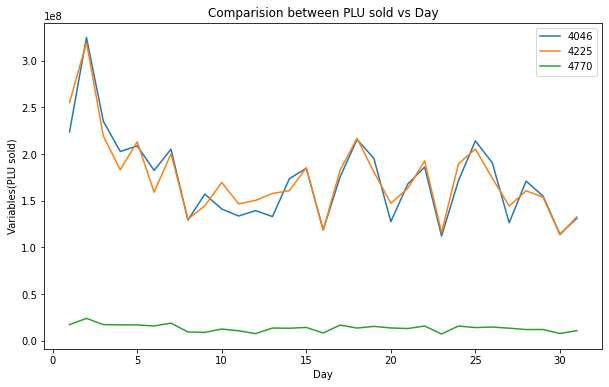

In [37]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()
variables.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

From the line plot we can observe how the total number of avocados with PLU 4046, PLU 4225 and PLU 4770 are sold in each day starting from day 1 to day 31. We can notice very few avocados with 4046 was sold in all the day and the avocados with PLU 4225 and PLU 4770 was sold all time high.

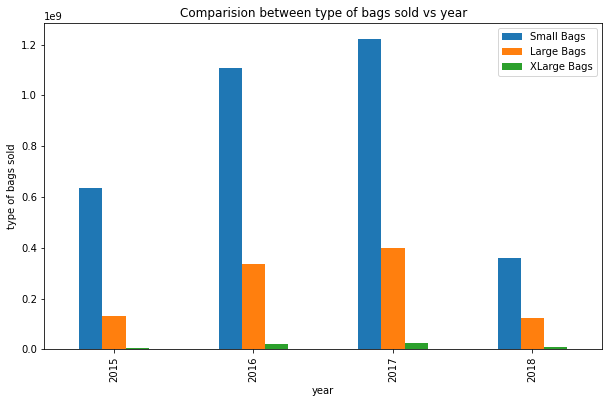

In [38]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("year")
plt.ylabel("type of bags sold")
plt.show()

Small bag size was sold all time highest where Xlarge Bag size was least sold.

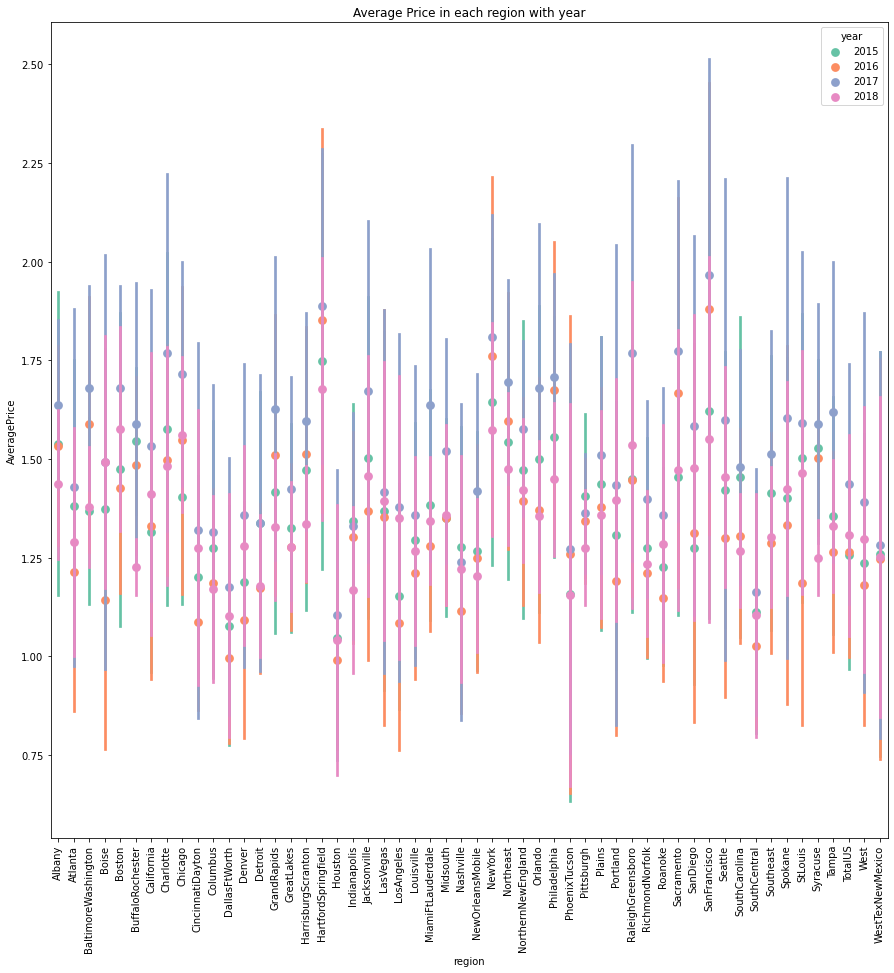

In [39]:
plt.figure(figsize=(15,15))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=df, hue='year',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

The average price of the avocado is high in the region SanFrancisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high in the year 2017 and less in the year 2018.

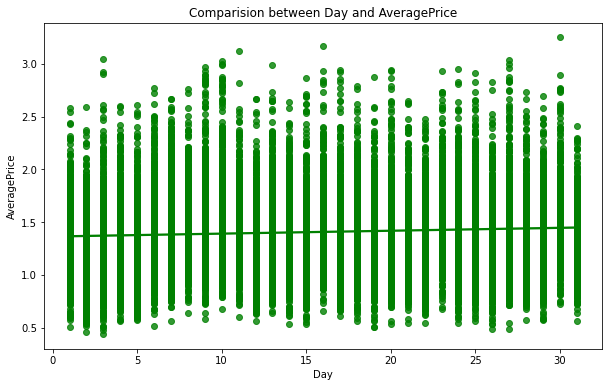

In [40]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Day and AveragePrice')
sns.regplot(df['Day'],df['AveragePrice'],color="g");
plt.show()

The average price of the avocado is high in almost all the days and less in 7th, 14th and 22nd day of the month.

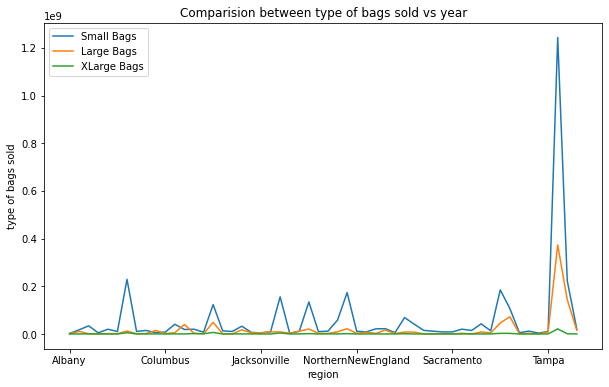

In [41]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.region).sum()
feature.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("region")
plt.ylabel("type of bags sold")
plt.show()

Small bags size sold high in the region Tampa. The price of Small bag size is also high in this region followed by Large Bags Size and Xlarge Bags size was sold least.

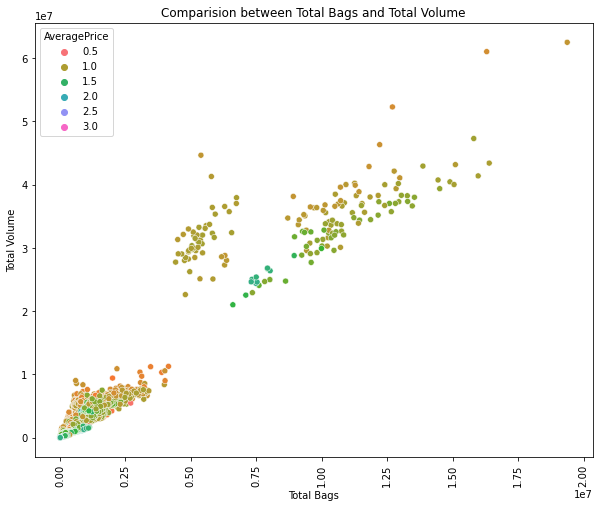

In [42]:
plt.figure(figsize=(10,8))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="AveragePrice",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

There is a linear relationship between the features. As the total bags sales increases with total volume, the average price of the avocado also increases.

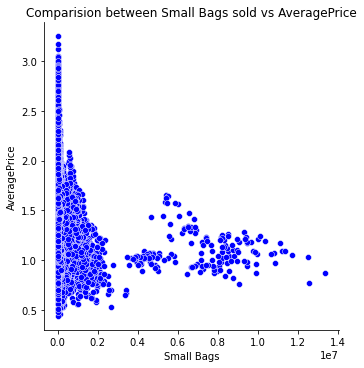

In [43]:
sns.relplot(df['Small Bags'],df['AveragePrice'],color="b");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

The Small Bags size has high average price at first and also from the range 0-0.6, the price of small bag type is almost 1.6.

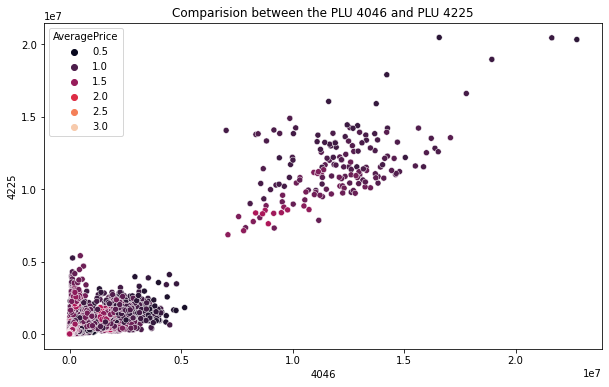

In [44]:
plt.figure(figsize=(10,6))
plt.title("Comparision between the PLU 4046 and PLU 4225")
sns.scatterplot(df["4046"],df["4225"],hue=df["AveragePrice"],palette="rocket")
plt.show()

There is a linear relationship between the total number of avocados with PLU 4046 and PLU 4225 sold. The number of avocados with PLU 4046 and PLU 4225 sold increases, the average price also increases as shown in the graph. These scatter plots can also be observed in the pairplot.

I have tried almost all the plotting techniques to get the best pattern, thinking that above plots are good to compare the relationship between the columns. To know more about the relationship between the features I will plot pairplot which is also a kind of scatterplot.

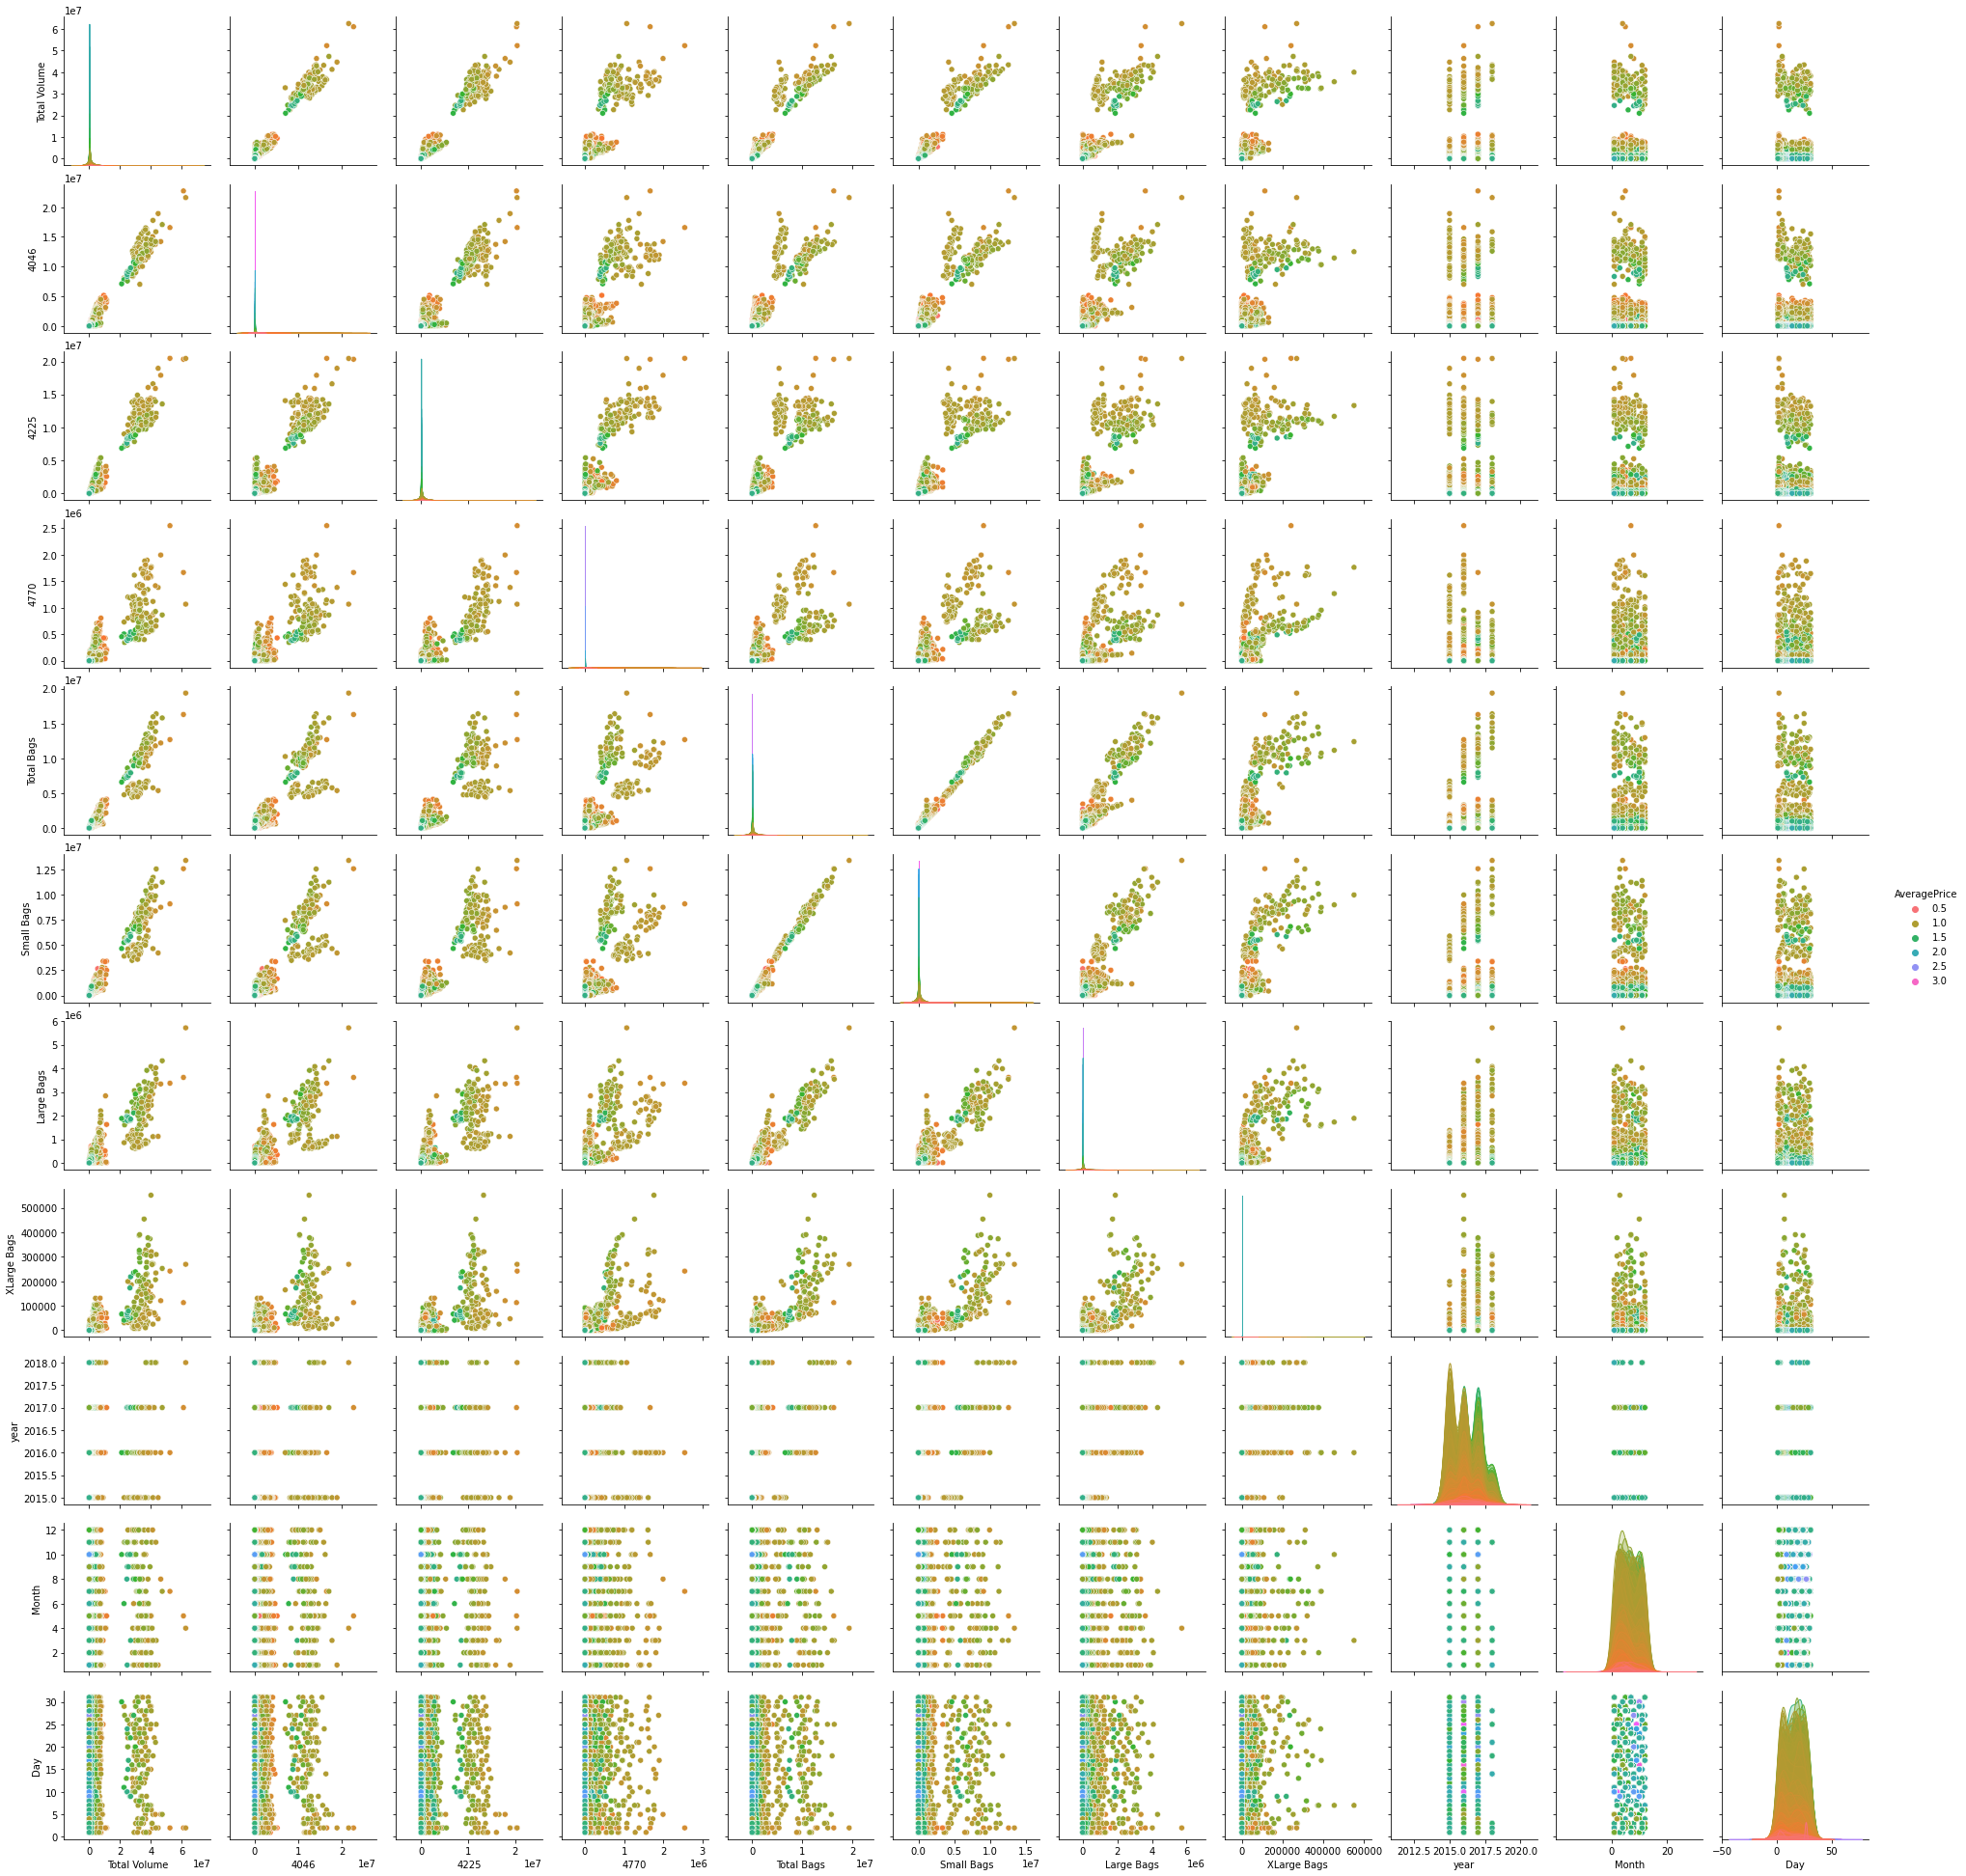

In [45]:
sns.pairplot(df,hue="AveragePrice",palette="husl")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "AveragePrice". Here we can observe the relation between the features and label.

From this pairplot we can observe that the existence of correlation between two variables and on the diagonal we can see distribution plotting.

Here we can infer that linear relationship exists in most of the columns and others have no much relationship with each other.

We can also notice the correlation between the features and some columns have outliers which we will remove using appropriate methods.

Day column is highly correlated with all the other features.

# Identifying the outliers

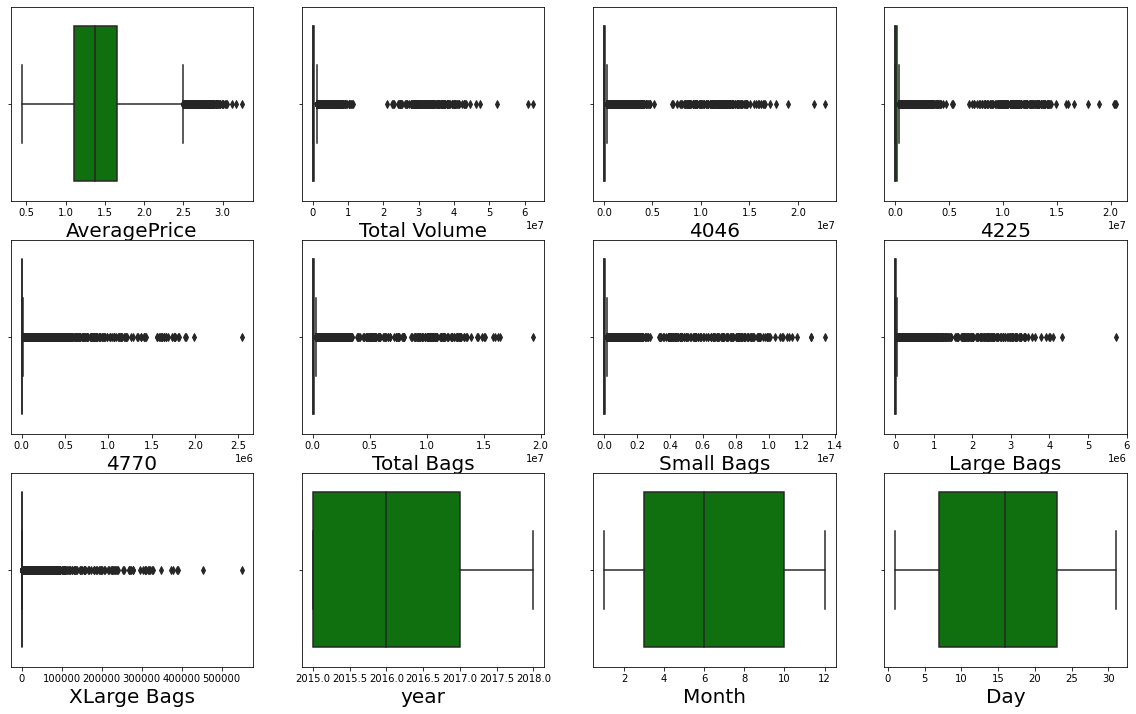

In [47]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The outliers present in all the columns except year, Month and Day. Let's remove the outliers using Zscore method. Even AveragePrice has outliers, since it is our target variable I will keep it untouched.

# Removing outliers

# 1.Zscore method

In [48]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [49]:
# Features containing outliers
features = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [50]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


Now the outliers have been removed.

In [51]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [52]:
# Shape of original dataset
df.shape

(18249, 14)

Before removing the outliers we had 18249 rows and 14 columns in our dataset.

In [53]:
# Shape of new dataframe
new_df.shape

(17782, 14)

After removing the outliers we have 17782 rows and 14 columns.

In [54]:
# Checking the the data loss
data_loss = (18249-17782)/18249*100
data_loss

2.55904433119623

I am losing only 2.5% of data, so removing outliers.

Let's remove the outliers and check data loss using IQR method.

# 2. IQR (Inter Quantile Range) method

In [55]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [56]:
df1.shape

(11747, 14)

Using IQR method the dataframe has 11747 rows and 14 columns.

In [57]:
# Let's check the dataloss
data_loss = (18249-11747)/18249*100
data_loss

35.62934955340019

Using IQR method I am losing more data. So let's consider Zscore method only.

# Checking for skewness

In [58]:
# Checking the skewness
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

All the columns have skewness except year, Month and Day. AveragePrice is our label so no need to remove skewness in this column.

# Removing skewness using yeo-johnson method

In [59]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [60]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [61]:
# Checking skewness after using yeo=johnson ethod
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

After using yeo-johnson method the skewness is still present in XLarge Bags, Let's remove skewness using log transformation.

In [62]:
# Removing skewness using log transformation
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])

The skewness has been removed, now let's check it.

In [64]:
# Let's check the skewness again
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

I have removed the skewness using both log1p and yeo-johnson method.

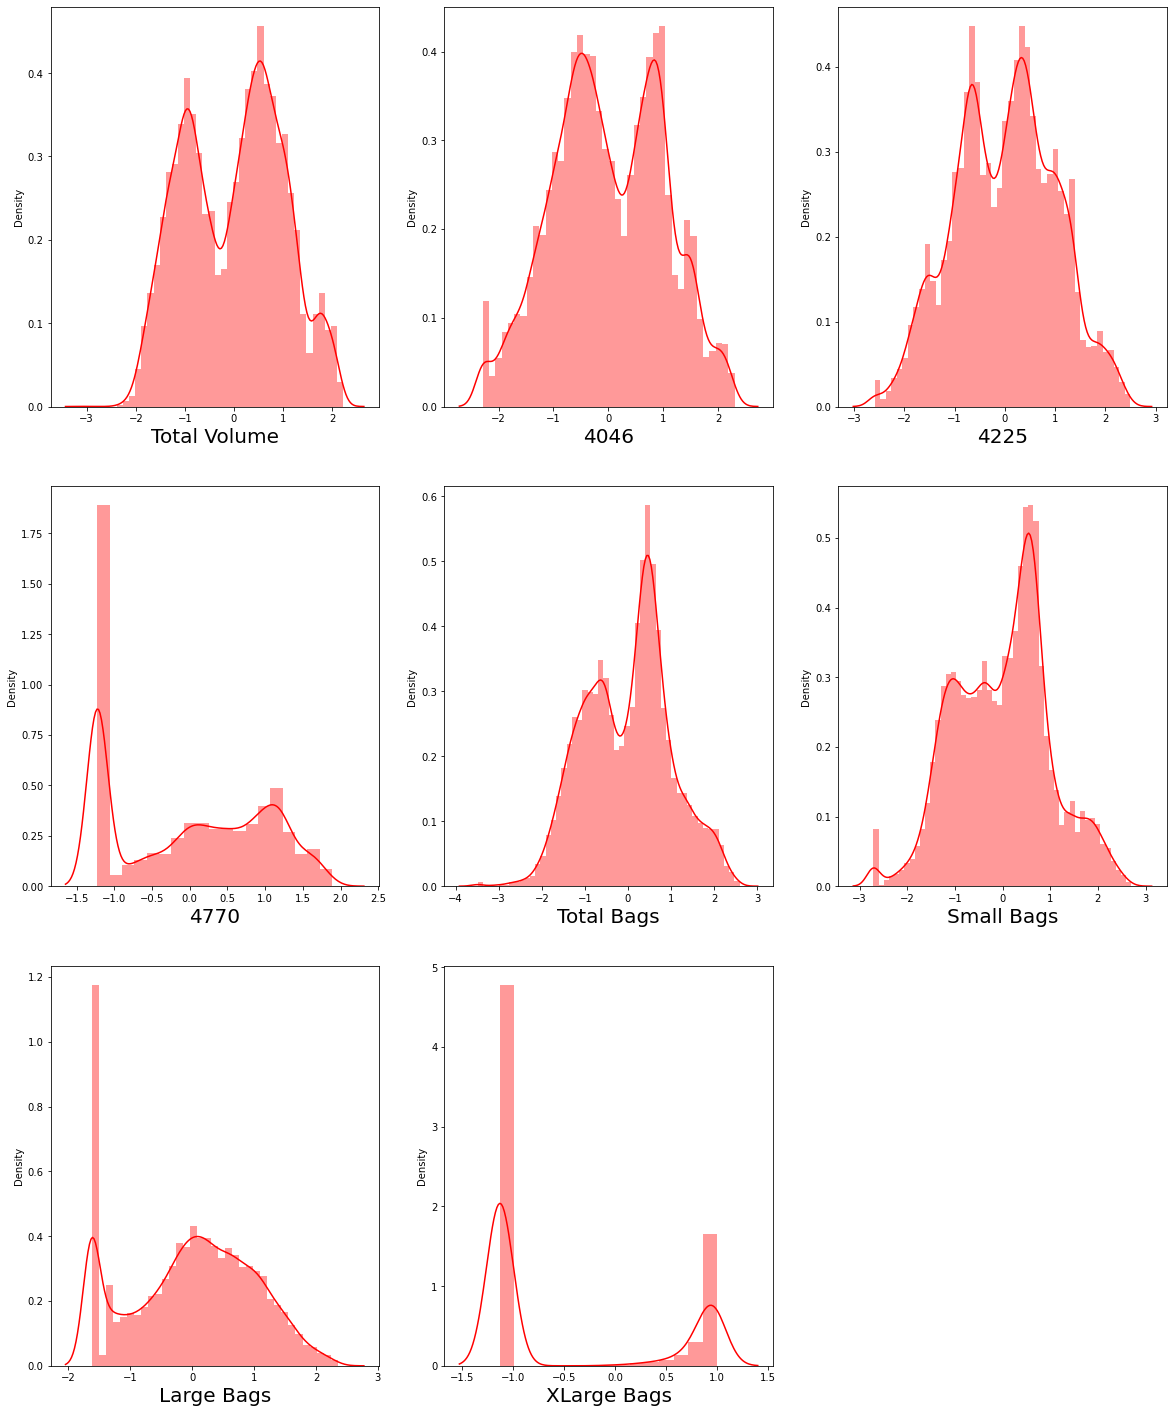

In [65]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data looks almost normal compare to previous data and the skewness is also removed.

# Encoding the categorical columns using Label Encoding

In [66]:
categorical_col = ["type","region"]

In [67]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [68]:
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


I have encoded the data using label encoding.

# Correlation between the target variable and independent variables using HEAT map

In [69]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.071568,0.058266
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.015294,-0.010471
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.014000,-0.009166
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.019092,-0.008019
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.012151,-0.000721
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.004350,-0.007650
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.002533,-0.003569
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.004320,-0.005833
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.015762,0.012778
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.003290,-0.003108


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

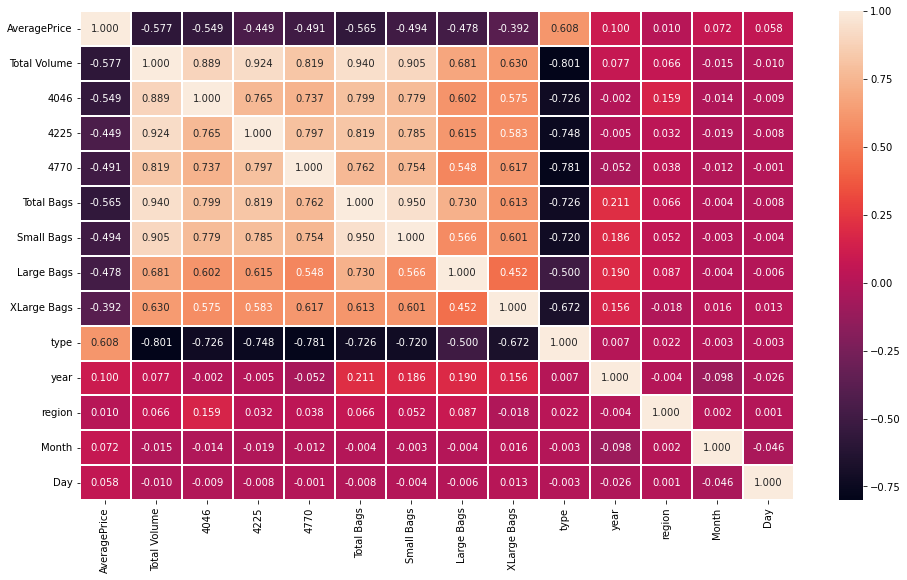

In [70]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.

Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target.

The features Day and region have no relation with the target so we can drop these columns.

Almost all the features are correlated with each other which leads to multicollinearity problem. We will solve this problem by VIF value.

Also most of the columns have no relation with each other and have zero correlation.

In [71]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
year            0.099910
Month           0.071568
Day             0.058266
region          0.010428
XLarge Bags    -0.392262
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

We can notice the positive and negative correlated features with label.

# Visualizing the correlation between label and features using bar plot

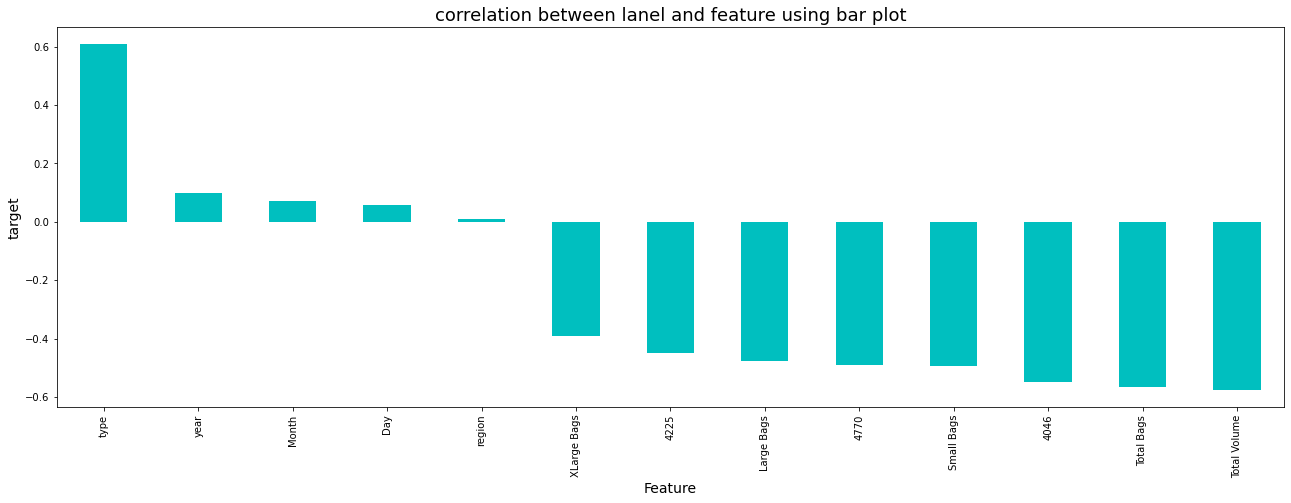

In [72]:
plt.figure(figsize=(22,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

The features region and Day have very less correlation with the target so we can drop these columns.

In [73]:
# Dropping irrelevant columns
new_df.drop("region",axis=1, inplace=True)
new_df.drop("Day",axis=1, inplace=True)

In [74]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,12
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,12
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,12
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,11


This is the dataframe after removing irrelevant columns.

# Separating the features and label variables into x and y

In [75]:
x = new_df.drop("AveragePrice", axis=1)
y = new_df["AveragePrice"]

In [76]:
x.shape

(17782, 11)

In [77]:
y.shape

(17782,)

In [78]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,12
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,12
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,12
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,6
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,11


This is the dataframe containing only features.

# Standard Scalarization

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,1.592359
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,1.592359
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,1.592359
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,-0.108942
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,1.308809
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.685946,0.974238,1.979143,-0.676043
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.685946,0.974238,1.979143,-1.526694
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.685946,0.974238,1.979143,-1.526694
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.685946,0.974238,1.979143,-1.526694


I have scaled my data now. Since we have multicollinearity problem, so let's use VIF factor to find it out.

# Checking VIF values to solve multicollinearity

In [80]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,51.737758,Total Volume
1,6.807430,4046
2,11.159354,4225
3,3.943322,4770
4,34.399137,Total Bags
5,16.626231,Small Bags
6,3.462229,Large Bags
7,2.059065,XLarge Bags
8,3.718878,type
9,1.344705,year


The VIF value is more than 10 in the features Total Volume, 4225, Total Bags, Small Bags and Large Bags. First I will remove the column having high VIF value and will check the VIF again, if the value retains more than 10 then I will drop the specific column again.

In [81]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [82]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,3.535544,4046
1,4.267691,4225
2,3.928942,4770
3,24.471985,Total Bags
4,16.625988,Small Bags
5,3.418790,Large Bags
6,2.046775,XLarge Bags
7,3.487117,type
8,1.342864,year
9,1.018935,Month


The multocollinearity problem still exists so let's drop the feature Total Bags which has VIF value more than 10.

In [83]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [84]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,3.517055,4046
1,4.124058,4225
2,3.928634,4770
3,4.081245,Small Bags
4,1.862150,Large Bags
5,2.046572,XLarge Bags
6,3.483920,type
7,1.319514,year
8,1.018652,Month


The VIF value is less than 10 in all the features which means we have solved the multicollinearity problem. Now we can move to model building.

In [85]:
# DataFrame after preprocessing and data cleaning
x.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,1.592359
1,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,1.592359
2,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,1.592359
3,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,-0.108942
4,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,1.308809


Now we have resolved the multicollinearity problem. We have done with the preprocessing here. Now let's move to model selection

# Modeling

# Finding best random state

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [87]:
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.7482906727902638  on Random_state  113


I am getting maximum R2 score 74.82% on the basis of Random state 113.

# Creating new train test split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

I am creating new test train split

# Regression Algorithms

In [91]:
rom sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Random Forest Regressor

In [92]:
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.8166655319194696
MAE: 0.11983866916588566
MSE: 0.02922895660168697
RMSE: 0.17096478175836968
Cross_Validaton_Score 0.29438307962285387


Thr R2 score using GradientBoosting Regressor regressor is 81.66%

# Support Vector Machine Regressor

In [93]:
# Checking R2 score for Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)

# prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',metrics.mean_absolute_error(y_test, predsvr))
print('MSE:',metrics.mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.7126710085072829
MAE: 0.15696540232498726
MSE: 0.045808770771124795
RMSE: 0.2140298361703919
Cross_Validaton_Score 0.15902008474442414


Thr R2 score using GradientBoosting Regressor regressor is 71.26%

# Linear Regression

In [94]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',metrics.mean_absolute_error(y_test, predLR))
print('MSE:',metrics.mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.48427922534991863
MAE: 0.22134364442604618
MSE: 0.0822212009484998
RMSE: 0.2867423947526766
Cross_Validaton_Score 0.06964698102072948


Thr R2 score using GradientBoosting Regressor regressor is 48.42%

# Stochastic Gradient Descent Regressor

In [95]:
# Checking R2 score for Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

# Checking cv score for Stochastic Gradient Descent Regressor
print("Cross_Validaton_Score",cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.4840487181184687
MAE: 0.2209303790389162
MSE: 0.0822579506439333
RMSE: 0.2868064689715581
Cross_Validaton_Score 0.06453534346135781


Thr R2 score using GradientBoosting Regressor regressor is 48.40%

# KNeighbors Regressor

In [96]:
# Checking R2 score for KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.7482906727902638
MAE: 0.14180393626991564
MSE: 0.04012993889409559
RMSE: 0.20032458384855212
Cross_Validaton_Score 0.11874592586201771


Thr R2 score using GradientBoosting Regressor regressor is 74.82%

# GradientBoosting Regressor

In [97]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.6592273916365532
MAE: 0.17586149833186981
MSE: 0.05432926980497577
RMSE: 0.2330863998713262
Cross_Validaton_Score 0.3130588189088385


Thr R2 score using GradientBoosting Regressor regressor is 65.92%

# Hyperparameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
#KNeighbors Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}

In [100]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [101]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [102]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}

This gives the best parameter value.

In [103]:
avocado =KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avocado.fit(x_train, y_train)
pred = avocado.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.17096478175836968
R2_Score: 76.32960938808363


After tuning the R2 score of the model is increasing and is giving 76.32% which is good.

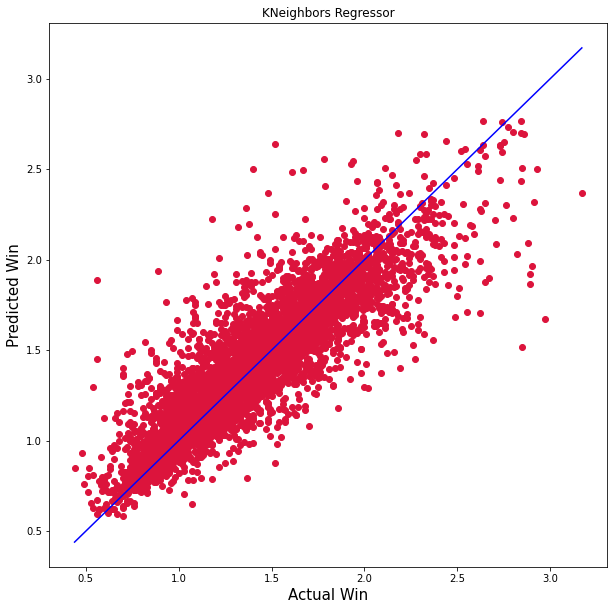

In [106]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')
plt1 = max(max(pred), max(y_test))
plt2 = min(min(pred), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual Win', fontsize=15)
plt.ylabel('Predicted Win', fontsize=15)
plt.show()

# Saving the model

In [107]:
# Saving the model using .pkl
import joblib
joblib.dump(avocado,"Avocado.pkl")

['Avocado.pkl']

I have saved my model using .pkl.

# Predicting the saved model

In [108]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avocado.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0.9193629 , 1.14341698, 1.14770659, ..., 1.69566434, 2.28963131,
       1.1757595 ])

These are the predicted average price of the avocado.

In [109]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,5325,5326,5327,5328,5329,5330,5331,5332,5333,5334
Predicted,0.919363,1.143417,1.147707,1.053066,1.386706,1.242534,1.468426,1.744058,1.098303,1.806199,...,1.294091,1.429599,1.238366,1.454199,1.593887,1.86498,1.179274,1.695664,2.289631,1.175759
Original,1.050000,1.630000,1.230000,0.910000,1.370000,1.300000,1.410000,1.600000,1.170000,1.970000,...,1.390000,1.430000,1.270000,1.160000,1.670000,2.10000,1.320000,1.640000,2.300000,1.120000


We can observe both original and predicted values are almost same.

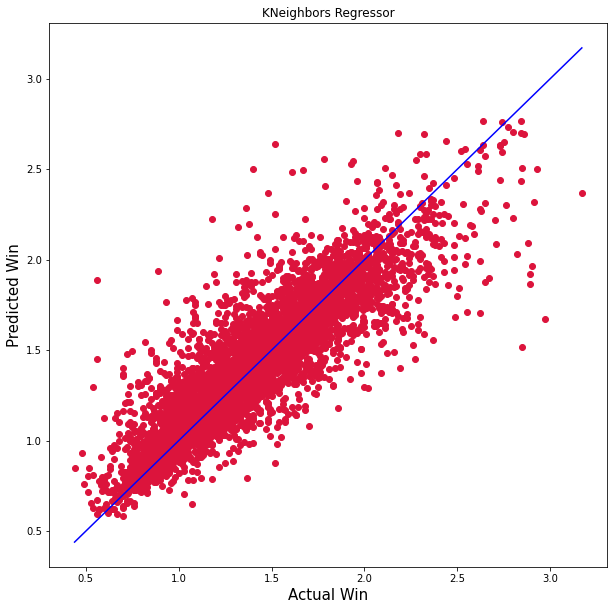

In [110]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual Win', fontsize=15)
plt.ylabel('Predicted Win', fontsize=15)
plt.show()